In [0]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Cocus' 
save_path = '/content/drive/My Drive/Cocus/save_files'

Import all required Library

In [0]:
import numpy as np #linear algebra
import pandas as pd # data preprocessing

# general imports
import math 
import glob, os, io
from functools import reduce

# Plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# pyplot imports
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.io as pio # Change the renders, if you use colab
pio.renderers.default = "colab"

# Scipy Imports
from scipy import stats
from scipy import optimize
from scipy import spatial

# PCA/Clustering/Normalization Imports
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score

Read all CSV Files

In [0]:
# Read All files
all_df = [pd.read_csv(i) for i in glob.glob(os.path.join(file_path, "*.csv"))]

# Merge based on Country column
all_df = reduce(lambda df1,df2: pd.merge(df1,df2,on='country'), all_df)

# Remove Unnamed Column Name
all_df = all_df.loc[:, ~all_df.columns.str.contains('Unnamed')]

**1. Hypothesis Testing**

- In this section I used Hypothesis testing to test the correlation between variables (features or attributes) to determine the linear relationship in the sample data which can effectively models the relationship in population

- Based on small EDA in the previous Notebook, I observed that there is a strong correlation between the variables : 

  *(%) job satisfaction  **Vs** (%) Life satisfaction **Vs** (%) Leisure satisfaction with their repective High/medium/Low level*.


- So in this section, I use **hypothesis test** in order to determine the significance of correlation coefficient between Job satisfaction and Life satisfaction. (either Pearson’s or Spearman's)

- If these two variables are linearly related, then i can able to infer about the *Entire Europe population correlation coefficient between these two variables*.




In [0]:
# fig = go.Figure()
# fig.add_trace(go.Box(y=all_df["prct_job_satis_high"]))
# fig.add_trace(go.Box(y=all_df["prct_life_satis_high"]))
# fig.show()

fig = px.box(all_df, y="prct_life_satis_high")
fig.show()

# fig = go.Figure(data=[go.Box(y=all_df["prct_job_satis_high"],
#             boxpoints='all', # can also be outliers, or suspectedoutliers, or False
#             jitter=0.3, # add some jitter for a better separation between points
#             pointpos=-1.8 # relative position of points wrt box
#               )])
# fig.show()



In [0]:
plt.figure(figsize=(10,8))
sns.lmplot(x="prct_job_satis_high", y="prct_life_satis_high", data=all_df)

In [0]:
plt.figure(figsize=(10,8))
sns.lmplot(x="prct_life_satis_high", y="prct_job_satis_high", data=all_df)

In [0]:
plt.figure(figsize=(10,8))
sns.lmplot(x="prct_life_satis_high", y="prct_leisure_satis_high", data=all_df)

In [0]:
plt.figure(figsize=(10,8))
sns.lmplot(x="prct_job_satis_high", y="prct_leisure_satis_high", data=all_df)

In [0]:
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
sns.distplot(all_df['prct_job_satis_high'],bins=5)
plt.subplot(1,2,2)
sns.distplot(all_df['prct_life_satis_high'],bins=5)

**1.1 If the people were highly satisfied with their Job, does it means they are also satisfied and happy in their Life too ?**
- To check for significant difference between *percentage_high_job_satisfaction* & *percentage_high_life_satisfaction*. In another words, I am testing the association (or relationship) between Job satisfaction Vs Life satisfaction.
- I am examining the samples from different countries in Europe to draw conclusion about the linear relationship b/w those 2 variables which would provide a strong evidence by concluding there is a linear relationship in the entire Europe population b/w these two variables. 

**1.2 Defining the Hypothesis, Level of significance & Test Statistics method**
- Ho (null hypothesis)      : 
  -  ρ = 0 (Correlation coefficient b/w two variables is 0)
  - there is **no significant** linear relation between Job & Life satisfaction % in population

- Ha (alternate hypothesis) :
  -  ρ ≠ 0 (Correlation coefficient b/w two variables is not equal to 0)
  - there **is significant** linear relation between Job & Life satisfaction % in population
- Two tailed Test, with assumed significance level
  - α = 0.05 
  - Since it is two tailed, each tail carries α/2 = 0.025
- To test the significance of correlation coefficient, the test statistics can be determined either through T Distribution or Z Transformation
  - Here, I use T Distribution for my test statistics calculation
  - t = r*sqrt((n-2)/(1-r2))

**1.3 Hypothesis Testing Function**

In [0]:
def hypo_test(X, Y, n):
  
  df = n-2
  # calculate the critical Value # df = number of samples -2
  cv = stats.t.ppf(q=0.975, df=df) 
  print("Critical Value  (+/-):\n", cv)
  # Determine the correlation coefficient (scipy library)
  r, p = stats.pearsonr(X,Y)
  # print("Correlation b/w two varables, r :", r)
  # calculate the Test Statistics
  t_stat = r*math.sqrt(df/(1-(r*r)))
  print("\n Test Statistics  (+/-) : \n", t_stat)
  # Calculate P value
  p_value = 1 - stats.t.cdf(x=t_stat,df=df) #t_stat
  print("\n p value : \n", p_value)
  # Final Result
  print("\n Result :")
  if p_value < 0.025:
    print("\n Reject Null Hypothesis")
  else:
    print("\n Fail to Reject New hypothesis")

  return
# call the function
hypo_test(all_df["prct_job_satis_high"], all_df["prct_life_satis_high"], all_df["prct_job_satis_high"].shape[0])

Critical Value  (+/-):
 2.0422724563012373

 Test Statistics  (+/-) : 
 9.84345407612915

 p value : 
 3.299249762278578e-11

 Result :

 Reject Null Hypothesis


**1.4 CONCLUSION : Rejecting the Null hypothesis**

- Based on the above results, T test statistics value is larger than critical value. Also, the p_value is very smaller than 0.025 at one tail.  
- So the eveidence is strong enough to reject Null hypothesis at 95% confidence level.
- This indicates that, there is correlation between both the variables. There exists a linear relationship in the between those variables in Entire europe population too. If the people we highly satisifed with their job then the people are satisfied in their life too. 




---



In [0]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

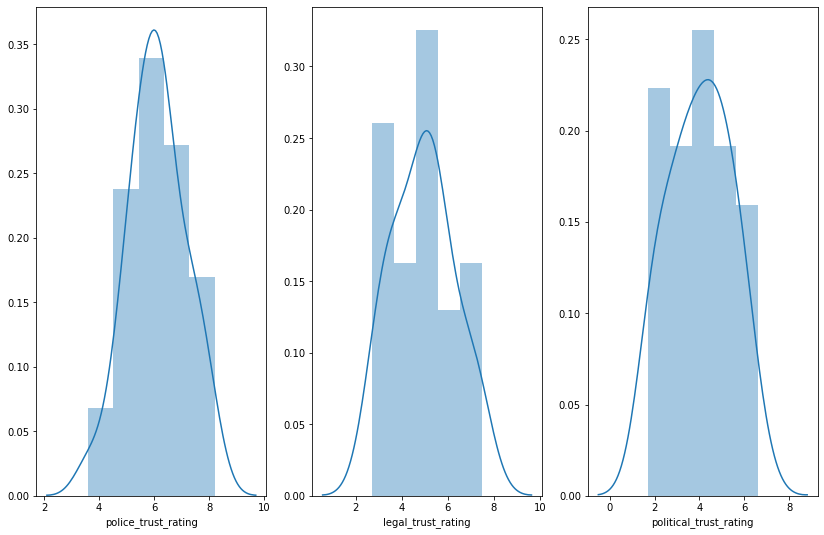

In [0]:
# all_df["police_trust_rating"].hist()

plt.figure(figsize=(14,9))
plt.subplot(1,3,1)
sns.distplot(all_df['police_trust_rating'],bins=5)
plt.subplot(1,3,2)
sns.distplot(all_df['legal_trust_rating'],bins=5)
plt.subplot(1,3,3)
sns.distplot(all_df['political_trust_rating'],bins=5)

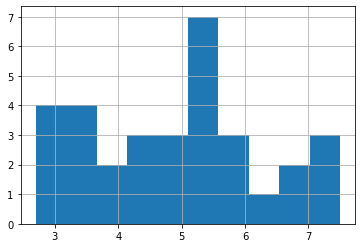

In [0]:
all_df["legal_trust_rating"].hist()

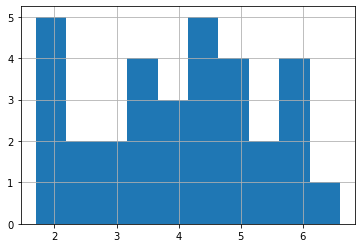

In [0]:
all_df["political_trust_rating"].hist()

In [0]:
all_df.columns

Index(['country', 'prct_low_savings', 'police_trust_rating',
       'prct_budget_veryhard', 'prct_budget_hard', 'prct_budget_somehard',
       'prct_budget_someeasy', 'prct_budget_easy', 'prct_budget_veryeasy',
       'prct_health_verygood', 'prct_health_good', 'prct_health_fair',
       'prct_health_bad', 'prct_health_verybad', 'legal_trust_rating',
       'prct_rpt_pollution', 'med_income_underemp', 'median_income',
       'total_pop', 'prct_yng_adt_pop', 'political_trust_rating', 'unemp_rate',
       'prct_env_satis_high', 'prct_env_satis_med', 'prct_env_satis_low',
       'gdp', 'life_expect', 'prct_close_relat', 'prct_leisure_satis_high',
       'prct_leisure_satis_med', 'prct_leisure_satis_low', 'avg_temp',
       'avg_high_temp', 'avg_low_temp', 'avg_precipitation', 'prct_rpt_crime',
       'prct_job_satis_high', 'prct_job_satis_med', 'prct_job_satis_low',
       'prct_life_satis_high', 'prct_life_satis_med', 'prct_life_satis_low'],
      dtype='object')

In [0]:
plt.figure(figsize=(10,8))
sns.lmplot(x="avg_temp", y="avg_precipitation", data=all_df)

In [0]:
all_df[["avg_temp","avg_precipitation"]].corr()

,avg_temp,avg_precipitation
avg_temp,1.000000,-0.281215
avg_precipitation,-0.281215,1.000000


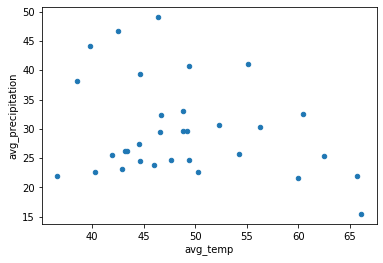

In [0]:
all_df.plot.scatter(x="avg_temp", y="avg_precipitation")

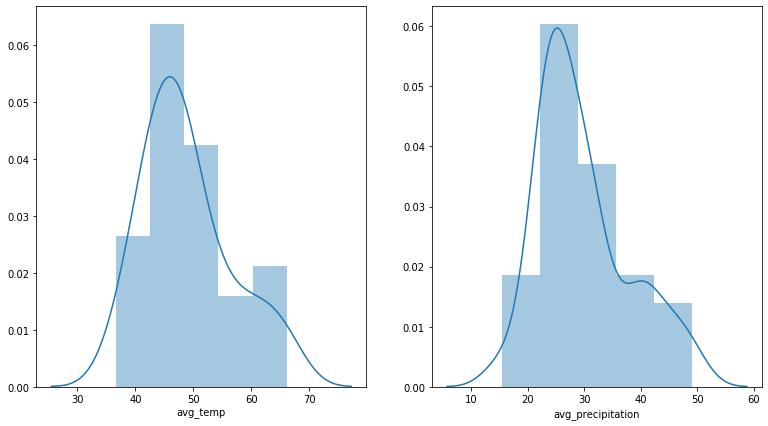

In [0]:
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
sns.distplot(all_df['avg_temp'],bins=5)
plt.subplot(1,2,2)
sns.distplot(all_df['avg_precipitation'],bins=5)

(array([ 5., 12.,  8.,  3.,  4.]),
 array([36.6, 42.5, 48.4, 54.3, 60.2, 66.1]),
 <a list of 5 Patch objects>)

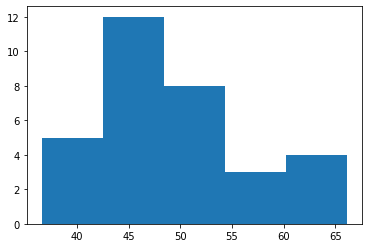

In [0]:
plt.hist(all_df['avg_temp'],bins=5)

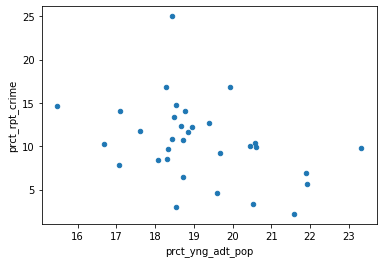

In [0]:
all_df.plot.scatter(x="prct_yng_adt_pop", y="prct_rpt_crime",)

In [0]:
plt.figure(figsize=(10,8))
sns.lmplot(x="prct_yng_adt_pop", y="prct_rpt_crime", data=all_df)

In [0]:
all_df[["prct_yng_adt_pop","prct_rpt_crime"]]

**3. Clustering Algorithm**
- As stated in my previous notebook, I split the entire dataframe in to two
  1. Interms of their best governance
  2. Interms of Immigration criteria
- Below I had performed K means clustering algorithm to detect the best governing nations in EU.

**3.1 Preprocessing or preparing the Dataframe *df_govern* for clustering**

In [0]:
# DF with Governance respected columns
df_govern = all_df[["gdp", "life_expect",'total_pop', 'prct_yng_adt_pop', 'prct_low_savings','prct_budget_veryhard',
                    'prct_budget_hard', 'prct_budget_somehard','prct_budget_someeasy', 'prct_budget_easy', 'prct_budget_veryeasy',
                    'med_income_underemp','prct_health_verygood', 'prct_health_good', 'prct_health_fair', 'prct_health_bad', 
                    'prct_health_verybad', 'unemp_rate','prct_rpt_crime','prct_env_satis_high', 'prct_env_satis_med', 'prct_env_satis_low',
                    'prct_close_relat','median_income', 'police_trust_rating','legal_trust_rating']]
print("Initial shape of df_governance :", df_govern.shape)

# converted very hard, hard, some hard as single column & very easy, easy, some easy as single column
# Make good health & bad health as single columns
df_govern_new = df_govern.copy()
df_govern_new["prct_hard_sum_budget"]      = df_govern_new[['prct_budget_veryhard','prct_budget_hard', 'prct_budget_somehard']].sum(axis=1)
df_govern_new["prct_easy_sum_budget"]      = df_govern_new[['prct_budget_someeasy', 'prct_budget_easy', 'prct_budget_veryeasy']].sum(axis=1)
df_govern_new["prct_health_good_sum"]      = df_govern_new[['prct_health_verygood', 'prct_health_good']].sum(axis=1)
df_govern_new["prct_health_bad_sum"]       = df_govern_new[['prct_health_bad', 'prct_health_verybad']].sum(axis=1)


# Drop req columns
df_govern_new = df_govern_new.drop(['prct_budget_veryhard','prct_budget_hard', 'prct_budget_somehard','prct_budget_someeasy', 'prct_budget_easy', 
                                    'prct_budget_veryeasy',"prct_health_verygood","prct_health_good",'prct_health_bad','prct_health_verybad',
                                    'prct_env_satis_high','prct_env_satis_med', 'prct_env_satis_low'], axis=1)

print("\nAfter preprocessing, the shape of df_governance :", df_govern_new.shape)
print("\ndf_governance_new 1st 5 rows : \n", df_govern_new.head())


Initial shape of df_governance : (32, 26)

After preprocessing, the shape of df_governance : (32, 17)

df_governance_new 1st 5 rows : 
         gdp  life_expect  ...  prct_health_good_sum  prct_health_bad_sum
0  356237.6         81.8  ...                  70.2                  8.1
1  424660.3         81.5  ...                  73.7                  9.2
2   48128.6         74.9  ...                  65.8                 11.0
3  605753.7         83.7  ...                  77.7                  4.5
4   18490.2         82.7  ...                  78.7                  4.5

[5 rows x 17 columns]


**3.2 PCA (Principal Component Analysis) & K means Clustering & Standardization**

- After analyzing, combing PCA + Kmeans and fitting Kmeans algorithm directly to the dataframe, results in same cluster numbers.
- Because of visualization, I perform PCA + Kmeans so that one can visualize how the clusters formed
- Normalization or Standardization is not complusary to perform K means Clustering. Since in this dataset, every feature values are in different range. So I perfomed Standardization before performing K means clustering.

**Step 1 :Determining the nominal number of components for PCA & number of clusters for K means**

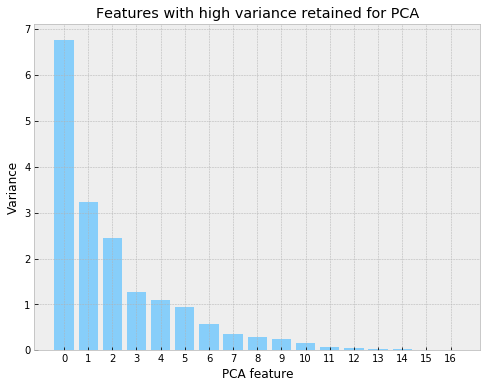

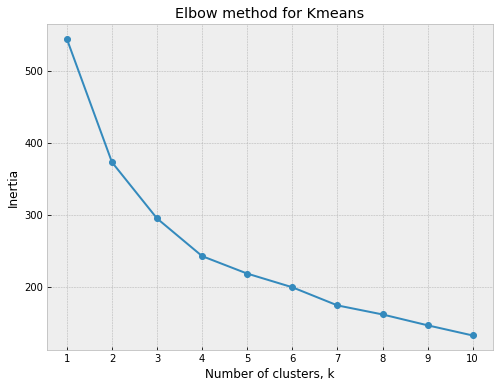

In [0]:
# DF Standardisation
def stand_scaler(dataframe):
  scaler = StandardScaler()
  df = scaler.fit_transform(dataframe)
  return df

# PCA function to check for how many features can be picked, so that it can retain high variance
def pca_comp(dataframe): 
  pca = PCA(random_state=123)
  pca.fit(stand_scaler(dataframe))
  features = range(pca.n_components_)
  df_pca = pca.fit_transform(stand_scaler(dataframe))
  fig = plt.figure(figsize=(8,6))
  plt.bar(features, pca.explained_variance_, color='lightskyblue')
  plt.title("Features with high variance retained for PCA")
  plt.xlabel('PCA feature')
  plt.ylabel('Variance')
  plt.xticks(features)
  plt.show()
  return df_pca

# K means, cluster selection using elbow method
def kmeans(dataframe):
  inertias = []
  ks = range(1,11)
  df = pca_comp(dataframe)
  for k in ks:
      model = KMeans(n_clusters=k)
      model.fit(df)
      inertias.append(model.inertia_)
  plt.figure(figsize=(8,6))
  plt.style.use('bmh')
  plt.plot(ks, inertias, '-o')
  plt.title("Elbow method for Kmeans")
  plt.xlabel('Number of clusters, k')
  plt.ylabel('Inertia')
  plt.xticks(ks)
  plt.show()
  return

# call the function
kmeans(df_govern_new)

**Note :** *Based on above graph i choose PCA components = 3 & for K means K value =3*

**Step 2 :Standardization + PCA (components = 3) + Kmeans(cluster, K = 3)**

In [0]:
def k_means(n_clust, data_frame):
  k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
  k_means.fit(data_frame)
  labels = k_means.labels_+1
  return k_means, labels

def pca_transform(n_comp, dataframe):
    pca = PCA(n_components=n_comp, random_state=123)
    Data_reduced = pca.fit_transform(stand_scaler(dataframe))
    df_w_pca = pd.DataFrame(Data_reduced, columns=["pca_"+str(i+1) for i in range(int(n_comp))])
    print('Shape of the PCA DF shape : ' + str(df_w_pca.shape))
    return Data_reduced, df_w_pca

# WITH PCA
Data_reduced, df_w_pca  = pca_transform(n_comp = 3, dataframe = df_govern_new)
k_means, labels = k_means(n_clust  .=2, data_frame=Data_reduced)
df_w_pca["cluster_no"] = list(labels)
df_w_pca["country"] = all_df["country"]
df_w_pca = df_w_pca.sort_values(by=["cluster_no"])


Shape of the PCA DF shape : (32, 3)


**Step : 3 Standardization + Kmeans(cluster, K = 3) No PCA**

In [0]:
# WITHOUT PCA
def k_means(n_clust, data_frame):
  k_means_wo_pca = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
  k_means_wo_pca.fit(data_frame)
  labels = k_means_wo_pca.labels_+1
  return  k_means_wo_pca, labels

k_means_wo_pca, labels_wo_pca = k_means(n_clust=2, data_frame=stand_scaler(df_govern_new))
df_wo_pca = pd.DataFrame({"country" : all_df["country"], "cluster_no_wo_pca" : labels_wo_pca}).sort_values(by=["cluster_no_wo_pca"])

**Step : 4 Visualize in 3D (2 clusters)** *italicized text*

In [0]:
fig = px.scatter_3d(df_w_pca, x='pca_1', y='pca_2', z='pca_3',title= "K means clustering with PCA", hover_name = "country",color="cluster_no")
# fig.update_traces(dict(showscale=False, visible= "legendonly"))#,  coloraxis=None, colorscale='gray'), selector={'type':'heatmap'})
fig.show()

**Step : 5 Cluster Analysis**
- I seperated countries and their variables with their respect to the two clusters
- Find the mean corresponding to each variable with repsect to two DF
- Understand the variable differnece between these two clusters


In [0]:
def two_cluster(df_govern_new,all_df,df_wo_pca):
  df_new = df_govern_new.copy()
  df_new["country"] = all_df["country"]
  df_new = pd.merge(df_new,df_wo_pca, on="country" )
  df_new = df_new.sort_values(by=["cluster_no_wo_pca"]).reset_index(drop=True)

  # seperate DF
  df_cluster_1 = df_new[df_new.cluster_no_wo_pca == 1]
  df_cluster_2 = df_new[df_new.cluster_no_wo_pca == 2]

  # Mean df
  df_cluster_1_mean = df_cluster_1.mean(axis=0)
  df_cluster_2_mean = df_cluster_2.mean(axis=0)

  # # Overall Df for 2 cluster
  df_all_clusters_mean = pd.concat([df_cluster_1_mean,df_cluster_2_mean], axis = 1)
  df_all_clusters_mean.columns = ["cluster_1", "cluster_2"]
  df_all_clusters_mean = df_all_clusters_mean.drop(["cluster_no_wo_pca"])
  df_all_clusters_mean.loc["countries"] = [list(df_cluster_1["country"]), list(df_cluster_2["country"])]
  return df_new, df_all_clusters_mean

# call the function  
df_new, df_all_clusters_mean = two_cluster(df_govern_new,all_df,df_wo_pca)
print(df_all_clusters_mean)

In [0]:
# make the index as one column
df_total = df_all_clusters_mean.rename_axis('variables').reset_index()
df_total_r1 = df_total[~df_total["variables"].isin(["gdp", "total_pop", "prct_yng_adt_pop", "median_income", "countries"])]

# only % related columns
# df_prct = df_total_r1.loc[df_total_r1["variables"].isin([str(i) for i in list(df_total_r1.loc[:,"variables"]) if str(i[:4]) == "prct"]+["life_expect"])].reset_index(drop=True)

In [0]:
import warnings
warnings.filterwarnings('ignore')
layout = go.Layout(title = 'Clustering Result',xaxis = go.XAxis(title = 'Variables'),yaxis = go.YAxis(title = 'output values'))
fig = go.Figure(data=[go.Bar(name='Cluster 1', x=df_total_r1["variables"], y=df_total_r1["cluster_1"]),
                      go.Bar(name='Cluster 2', x=df_total_r1["variables"], y=df_total_r1["cluster_2"])],layout= layout)
# Change the bar mode
fig.update_layout(barmode='group', xaxis_tickangle= 90,width=1550, height=700)
fig.show()

# Coutries Information
layout_ = go.Layout(title = 'Countries Respective to Clusters')
fig = go.Figure(data=[go.Table(header=dict(values=['Cluster 1 countries', 'Cluster 2 countries'],line_color='darkslategray',fill_color='lightskyblue'),
                      cells=dict(values=[df_total[df_total["variables"]=="countries"]["cluster_1"].values[0], # 1st column
                                        df_total[df_total["variables"]=="countries"]["cluster_2"].values[0]], # 2nd column
                      line_color='darkslategray',fill_color='lightcyan'))], layout=layout_)

fig.update_layout(width=400, height=600)
fig.show()

**Step 6 : Observations between every varaiable**

*Variables where Cluster 1 better than Cluster 2*

1. Life Expectancy(years) - cluster 1 countries has high life expectation rate than cluster 2 countries (cluster 1 ↑ & cluster 2 ↓)
2. Low saving(%)          - cluster 1 countries has high saving % than cluster 2 countries (cluster 1 ↑ & cluster 2 ↓)
3. Unemployment rate - cluster 1 has lower unemployment rates that cluster 1 countries (cluster 1 ↑ & cluster 2 ↓)
4. Police Trust - cluster 1 country has higher trust towards police than cluster 2 countries (cluster 1 ↑ & cluster 2 ↓)
5. Legal Trust - cluster 1 country has higher trust towards Legal system than cluster 2 countries (cluster 1 ↑ & cluster 2 ↓)
6. % people find hard to meet yearly budget - In cluster 1, less % of people find hard to meet yearly budget than cluster 2 (cluster 1 ↑ & cluster 2 ↓)
7. % people find easy to meet yearly budget - In cluster 1, more % of people find easy to meet yearly budget than cluster 2 (cluster 1 ↑ & cluster 2 ↓)
8. % people are in good health - In cluster 1, more % people are in a good health condition than cluster 2 (cluster 1 ↑ & cluster 2 ↓)
9. % people are in bad health - In cluster 1, less % people are in a bad health condition than cluster 2 (cluster 1 ↑ & cluster 2 ↓)

*Variables where Cluster 2 better than Cluster 1* 

1. % people are in fair health  - In cluster 1, less % people are in a fair  health condition than cluster 2  (cluster 1 ↓ & cluster 2 ↑)
2. % Close relations - cluster 1 & cluster 2 countries has very good close relation ship %, where as cluster 2 has little higher %. (cluster 1 ↓ & cluster 2 ↑)
3. Median Income Underemployment - cluster 1 countries has a little higher underemployment rate than cluster 2. (cluster 1 ↓ & cluster 2 ↑)
4. Reported crime - cluster 1 has higher crime rate than cluster 2 countries (cluster 1 ↓ & cluster 2 ↑)

**CONCLUSION**
- Based on above analysis, **Cluster 1 countries are far better than Cluster 2 countries in terms of Governance variables**


---

